### 최소제곱법
- 선형 회귀는 정확한 예측선을 찾는 작업.
- 예측선을 직선을 의미. y = ax + b 라는 기본 공식을 사용
- 이 때 a는 기울기를 의미하고, b는 y절편을 의미한다. 
- 즉, 선형회귀는 정확한 예측선을 찾기 위해 최적의 기울기 a와 최적의 y절편 b를 찾는 것을 의미.
- 이 때, 최소 제곱법이 제공하는 공식을 이용하면 기울기와 y절편을 계산할 수 있다.
![1](image/1.png)
![2](image/2.png)


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 신경망 구조를 정의하는 것.
from tensorflow.keras.models import Sequential
# 층 구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 현재 프로젝트를 GPU에 할당한다.
# 사용한 가능한 GPU 목록을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [4]:
# 입력 데이터
공부한시간 = [2,4,6,8]
# 결과 데이터
성적 = [81,93,91,97]

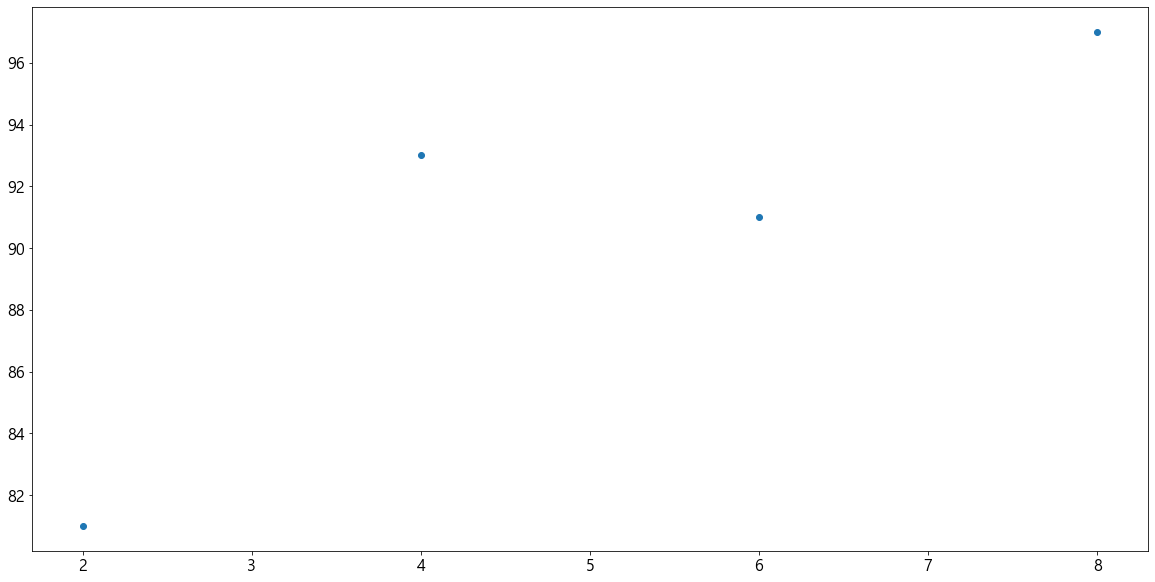

In [5]:
plt.scatter(공부한시간, 성적)
plt.show()

In [6]:
# 데이터를 ndarray로 생성한다.
a1 = np.array(공부한시간)
a2 = np.array(성적)

In [8]:
# x와 y의 평균을 구한다
x_mean = a1.mean()
y_mean = a2.mean()

print(x_mean)
print(y_mean)

5.0
90.5


In [9]:
# 기울기 계산을 위한 분모를 구한다.
a1 = 0

for a2 in 공부한시간 :
    a1 = a1 + ((a2 - x_mean) ** 2)
    
a1


20.0

In [10]:
# 기울기 계산을 위한 분자를 구한다.
a2 = 0 

for idx in range(len(공부한시간)) :
    a2 = a2 + ((공부한시간[idx] - x_mean) * (성적[idx] - y_mean))

a2


46.0

In [11]:
# 분자를 분모로 나누어 기울기를 계산한다.
기울기 = a2/a1
기울기

2.3

In [12]:
# y절편 구하기
y절편 = y_mean - (x_mean * 기울기)
y절편

79.0

In [13]:
# 학습 데이터를 통해 예측 성적을 계산한다. 
예측성적 = []

for v1 in 공부한시간 :
    a1 = (기울기 * v1) + y절편
    예측성적.append(a1)
    
예측성적


[83.6, 88.2, 92.8, 97.4]

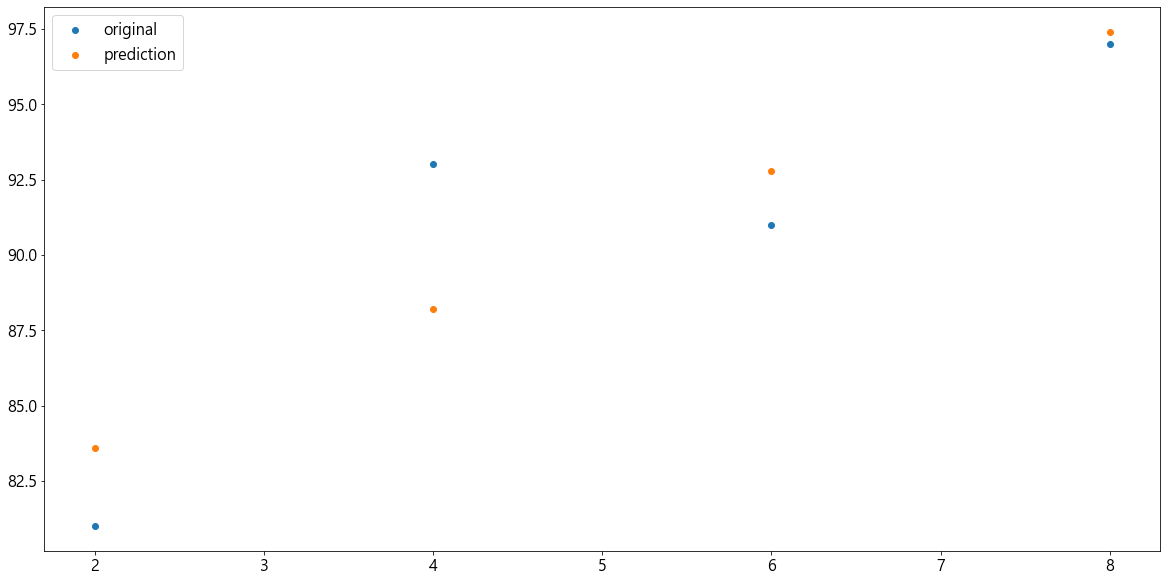

In [14]:
# 시각화
plt.scatter(공부한시간, 성적, label='original')
plt.scatter(공부한시간, 예측성적, label='prediction')
plt.legend()
plt.show()


In [16]:
# 1시간 공부한 경우의 성적 예측
pred = (기울기 * 1) + y절편
pred

81.3